In [18]:
import numpy as np
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import operator

In [19]:
def unitary_operator_exponent(circuit, control_q, target_q, theta, exponent):
    circuit.cu1(2*np.pi*theta*exponent, control_q, target_q)

In [20]:
def qpe_program(n, theta):

    qc = QuantumCircuit(n+1, n)

    qc.h(range(n))
    qc.x(n)
    
    for x in range(n):
        exponent = 2**(n-x-1)
        unitary_operator_exponent(qc, x, n, theta, exponent)
    
    qc.append(QFT(n).inverse(), range(n))
    
    qc.measure(range(n), range(n))
  
    return qc

In [34]:
n = 6; theta = 0.52
qc = qpe_program(n, theta)
qc.draw(output='text')

┌───┐                                                      ┌───────┐┌─┐   »
q_0: ┤ H ├─■────────────────────────────────────────────────────┤0      ├┤M├───»
     ├───┤ │                                                    │       │└╥┘┌─┐»
q_1: ┤ H ├─┼────────■───────────────────────────────────────────┤1      ├─╫─┤M├»
     ├───┤ │        │                                           │       │ ║ └╥┘»
q_2: ┤ H ├─┼────────┼────────■──────────────────────────────────┤2      ├─╫──╫─»
     ├───┤ │        │        │                                  │  iqft │ ║  ║ »
q_3: ┤ H ├─┼────────┼────────┼────────■─────────────────────────┤3      ├─╫──╫─»
     ├───┤ │        │        │        │                         │       │ ║  ║ »
q_4: ┤ H ├─┼────────┼────────┼────────┼────────■────────────────┤4      ├─╫──╫─»
     ├───┤ │        │        │        │        │                │       │ ║  ║ »
q_5: ┤ H ├─┼────────┼────────┼────────┼────────┼────────■───────┤5      ├─╫──╫─»
     ├───┤ │104.55  │52.276  │26.138  │13.069  │6.5345  │3.2673 └───────┘ ║  ║ »
q_6: ┤ X ├─■────────■────────■────────■────────■────────■─────────────────╫──╫─»
     └───┘                                                                ║  ║ »
c: 6/═════════════════════════════════════════════════════════════════════╩══╩═»
                                                                          0  1 »
«                 
«q_0: ────────────
«                 
«q_1: ────────────
«     ┌─┐         
«q_2: ┤M├─────────
«     └╥┘┌─┐      
«q_3: ─╫─┤M├──────
«      ║ └╥┘┌─┐   
«q_4: ─╫──╫─┤M├───
«      ║  ║ └╥┘┌─┐
«q_5: ─╫──╫──╫─┤M├
«      ║  ║  ║ └╥┘
«q_6: ─╫──╫──╫──╫─
«      ║  ║  ║  ║ 
«c: 6/═╩══╩══╩══╩═
«      2  3  4  5

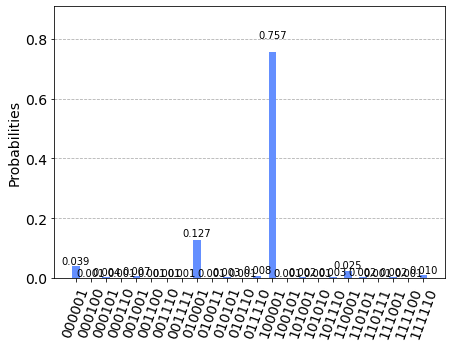

In [35]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=1000).result().get_counts(qc)
plot_histogram(counts)

In [32]:
highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
measured_theta = int(highest_probability_outcome, 2)/2**n
print("Using %d qubits with theta = %.2f, measured_theta = %.2f." % (n, theta, measured_theta))

Using 6 qubits with theta = 0.52, measured_theta = 0.52.
